# models comparison

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy.optimize import curve_fit


# BIC and mcFadden_R2
the first way to compare models is bayesian information criterion; BICs don't have a meaning by themselves it's the delta BIC between models that decides which model in better. the model with smaller BIC explains the behavior better.
## interpretation:

about BIC difference absolute amount:
0–2: Not worth more than a bare mention
2–6: good
6–10: Strong
+10: Very strong

In [2]:
output_dir = r"14_RL_agent_TDlearn_output_model_comparison_risk_dualQ_no_eta"
os.makedirs(output_dir, exist_ok=True)

file_see_colors = "11_RL_agent_TDlearn_output_risk_dualQ_no_eta/models_evaluation.csv"
file_see_numbers = "12_RL_agent_TDlearn_output_risk_dualQ_no_eta/models_evaluation.csv"
file_see_colors_and_numbers = "13_RL_agent_TDlearn_output_risk_dualQ_no_eta/models_evaluation.csv"


df_see_colors = pd.read_csv(file_see_colors)
df_see_numbers = pd.read_csv(file_see_numbers)
df_see_colors_and_numbers = pd.read_csv(file_see_colors_and_numbers)
df_see_colors_and_numbers

,participants,best_alpha_r,best_alpha_s,best_beta,BIC,AIC,accuracy,precision,sensitivity_recall,specificity,f1_score,mcFadden_r2,r2
0,07_11_2024_17_23_43,0.186570,0.006952,7.259557,265.508585,258.311741,0.718519,0.705882,0.727273,0.710145,0.716418,0.320324,-0.126482
1,08_11_2024_13_03_29,0.186570,0.006952,9.246936,260.367833,253.170989,0.718519,0.748428,0.767742,0.652174,0.757962,0.323551,-0.151192
2,11_11_2024_16_46_44,0.161221,0.006952,9.367300,235.939420,228.742576,0.725926,0.715328,0.736842,0.715328,0.725926,0.399470,-0.096537
3,12_11_2024_00_15_17,0.186570,0.006952,9.367300,252.177390,244.980546,0.637037,0.646617,0.627737,0.646617,0.637037,0.356081,-0.452171
4,13_11_2024_10_46_21,0.161221,0.006952,8.172222,255.100525,247.903681,0.700000,0.716535,0.669118,0.731343,0.692015,0.348347,-0.200066
5,13_11_2024_14_45_52,0.228798,0.006952,3.867353,317.769647,310.572803,0.659259,0.674242,0.644928,0.674242,0.659259,0.180651,-0.363636
6,14_11_2024_21_46_47,0.186570,0.006952,8.773394,252.753921,245.557077,0.737037,0.782946,0.701389,0.777778,0.739927,0.352565,-0.056548
7,15_11_2024_11_43_48,0.107891,0.006952,7.798755,295.398223,288.201379,0.640741,0.633588,0.628788,0.652174,0.631179,0.240441,-0.437747
8,17_11_2024_15_25_39,0.119594,0.006952,8.971103,287.071306,279.874462,0.655556,0.605839,0.680328,0.635135,0.640927,0.257987,-0.390673
9,17_11_2024_23_57_47,0.063558,0.006952,9.246936,328.067061,320.870217,0.581481,0.616541,0.569444,0.595238,0.592058,0.150706,-0.681548


# models evaluation metrics

Saved: 14_RL_agent_TDlearn_output_model_comparison_risk_dualQ_no_eta\models_evaluation_metrics.pdf


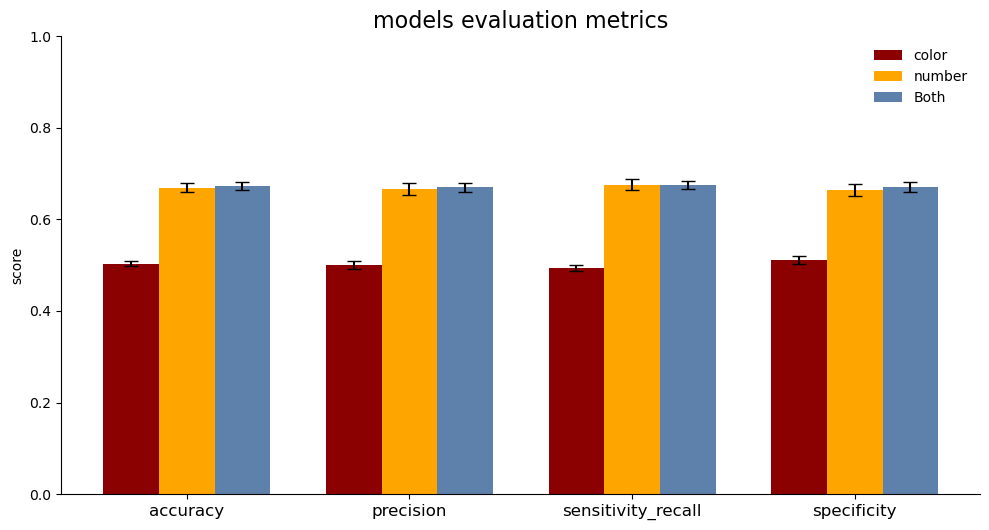

In [3]:
metrics = ['accuracy', 'precision', 'sensitivity_recall', 'specificity']
conditions = ['color', 'number', 'Both']
colors = ['#8b0000', 'orange', '#5e81ac']

# Compute means and SEMs
means = [
    df_see_colors[metrics].mean().values,
    df_see_numbers[metrics].mean().values,
    df_see_colors_and_numbers[metrics].mean().values
]

sems = [
    df_see_colors[metrics].sem().values,
    df_see_numbers[metrics].sem().values,
    df_see_colors_and_numbers[metrics].sem().values
]

means = np.array(means)
sems = np.array(sems)

# Plotting
x = np.arange(len(metrics))
width = 0.25

fig, ax = plt.subplots(figsize=(10, 6))
bars = []

for i in range(len(conditions)):
    bars.append(
        ax.bar(
            x + (i - 1) * width, 
            means[i], 
            width, 
            yerr=sems[i],
            capsize=5,
            label=conditions[i], 
            color=colors[i]
        )
    )

# Labels and aesthetics
ax.set_ylabel('score')
ax.set_title('models evaluation metrics', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(metrics, fontsize=12)
ax.set_ylim(0, 1)
legend = ax.legend(frameon=False)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


plt.tight_layout(rect=[0, 0, 1, 0.9]) 

filename = os.path.join(output_dir, "models_evaluation_metrics.pdf")
plt.savefig(filename, format='pdf')
print(f"Saved: {filename}")

plt.show()


# BIC and R2 calculations

In [4]:
bic_see_colors = df_see_colors["BIC"]
bic_see_numbers = df_see_numbers["BIC"]
bic_sees_colors_and_numbers = df_see_colors_and_numbers["BIC"]

aic_see_colors = df_see_colors["AIC"]
aic_see_numbers = df_see_numbers["AIC"]
aic_sees_colors_and_numbers = df_see_colors_and_numbers["AIC"]

mcFadden_r2_see_colors = df_see_colors["mcFadden_r2"]
mcFadden_r2_see_numbers = df_see_numbers["mcFadden_r2"]
mcFadden_r2_sees_colors_and_numbers = df_see_colors_and_numbers["mcFadden_r2"]

delta_bic_see_colors_see_numbers = bic_see_colors - bic_see_numbers
delta_bic_see_colors_and_numbers_see_colors = bic_see_colors - bic_sees_colors_and_numbers
delta_bic_see_colors_and_numbers_see_numbers = bic_see_numbers - bic_sees_colors_and_numbers

delta_aic_see_colors_see_numbers = aic_see_colors - aic_see_numbers
delta_aic_see_colors_and_numbers_see_colors = aic_see_colors - aic_sees_colors_and_numbers
delta_aic_see_colors_and_numbers_see_numbers = aic_see_numbers - aic_sees_colors_and_numbers

delta_mcFadden_r2_see_colors_see_numbers = mcFadden_r2_see_colors - mcFadden_r2_see_numbers
delta_mcFadden_r2_see_colors_and_numbers_see_colors = mcFadden_r2_see_colors - mcFadden_r2_sees_colors_and_numbers
delta_mcFadden_r2_see_colors_and_numbers_see_numbers = mcFadden_r2_see_numbers - mcFadden_r2_sees_colors_and_numbers



# BIC and R2 calculations visualizations

C:\Users\Nill\AppData\Local\Temp\1\ipykernel_2884\2283828842.py:11: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_bic = axs[0].boxplot(
C:\Users\Nill\AppData\Local\Temp\1\ipykernel_2884\2283828842.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_aic = axs[1].boxplot(
C:\Users\Nill\AppData\Local\Temp\1\ipykernel_2884\2283828842.py:25: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box_mcFadden = axs[2].boxplot(


Saved: 14_RL_agent_TDlearn_output_model_comparison_risk_dualQ_no_eta\models_evaluation_comparison_bic_r2.pdf


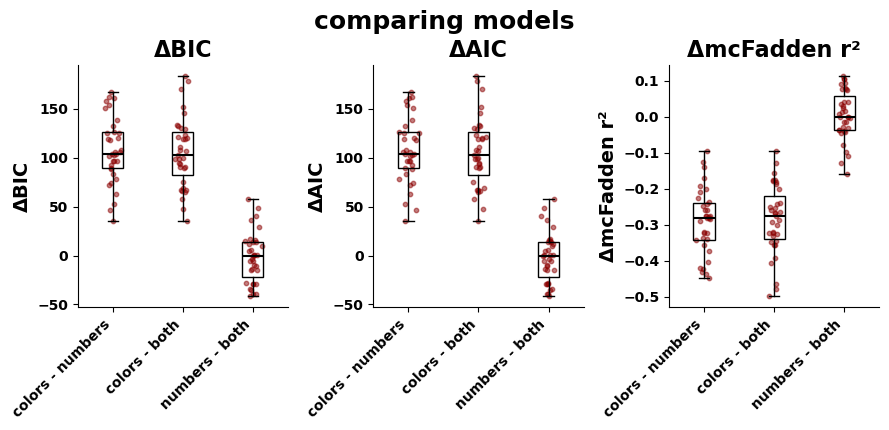

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(9, 5))

bic_deltas = [delta_bic_see_colors_see_numbers, delta_bic_see_colors_and_numbers_see_colors, delta_bic_see_colors_and_numbers_see_numbers]
aic_deltas = [delta_aic_see_colors_see_numbers, delta_aic_see_colors_and_numbers_see_colors, delta_aic_see_colors_and_numbers_see_numbers]
mcFadden_r2_deltas = [delta_mcFadden_r2_see_colors_see_numbers, delta_mcFadden_r2_see_colors_and_numbers_see_colors, delta_mcFadden_r2_see_colors_and_numbers_see_numbers]

bic_labels = ["colors - numbers", "colors - both", "numbers - both"]
mcFadden_labels = ["colors - numbers", "colors - both", "numbers - both"]

# Plot BIC deltas
box_bic = axs[0].boxplot(
    bic_deltas, vert=True, patch_artist=True, labels=bic_labels, 
    showmeans=False, 
    medianprops={'color': 'black', 'linewidth': 1.5}  
)

# Plot AIC deltas
box_aic = axs[1].boxplot(
    aic_deltas, vert=True, patch_artist=True, labels=bic_labels, 
    showmeans=False, 
    medianprops={'color': 'black', 'linewidth': 1.5}  
)

# Plot McFadden R2 deltas
box_mcFadden = axs[2].boxplot(
    mcFadden_r2_deltas, vert=True, patch_artist=True, labels=mcFadden_labels, 
    showmeans=False, 
    medianprops={'color': 'black', 'linewidth': 1.5}  
)

# Set box colors
for box in box_bic['boxes']:
    box.set(facecolor='none')
for box in box_aic['boxes']:
    box.set(facecolor='none')
for box in box_mcFadden['boxes']:
    box.set(facecolor='none')

scatter_colors = ['#8b0000', '#8b0000', '#8b0000']

# Add scatter points for BIC deltas
for i, delta in enumerate(bic_deltas):
    axs[0].scatter(np.random.normal(i + 1, 0.05, size=len(delta)), delta, alpha=0.5, s=10, color=scatter_colors[i])
axs[0].set_title("ΔBIC", fontsize=16, fontweight='bold')
axs[0].set_ylabel("ΔBIC", fontsize=14, fontweight='bold')

# Add scatter points for AIC deltas
for i, delta in enumerate(aic_deltas):
    axs[1].scatter(np.random.normal(i + 1, 0.05, size=len(delta)), delta, alpha=0.5, s=10, color=scatter_colors[i])
axs[1].set_title("ΔAIC", fontsize=16, fontweight='bold')
axs[1].set_ylabel("ΔAIC", fontsize=14, fontweight='bold')

# Add scatter points for McFadden R2 deltas
for i, delta in enumerate(mcFadden_r2_deltas):
    axs[2].scatter(np.random.normal(i + 1, 0.05, size=len(delta)), delta, alpha=0.5, s=10, color=scatter_colors[i])
axs[2].set_title("ΔmcFadden r²", fontsize=16, fontweight='bold')
axs[2].set_ylabel("ΔmcFadden r²", fontsize=14, fontweight='bold')

# Adjust axis properties
for ax in axs:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='y', labelsize=10)
    for label in ax.get_xticklabels() + ax.get_yticklabels():
        label.set_fontweight('bold')

for ax in axs:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

fig.suptitle('comparing models', fontsize=18, fontweight='bold', y=0.85)

plt.tight_layout(rect=[0, 0, 1, 0.9]) 

filename = os.path.join(output_dir, "models_evaluation_comparison_bic_r2.pdf")
plt.savefig(filename, format='pdf')
print(f"Saved: {filename}")

plt.show()


# now best alpha and best beta:

In [6]:
best_alphas_s_see_colors = df_see_colors["best_alpha_s"]
best_alphas_s_see_numbers = df_see_numbers["best_alpha_s"]
best_alphas_s_sees_colors_and_numbers = df_see_colors_and_numbers["best_alpha_s"]


best_alphas_r_see_colors = df_see_colors["best_alpha_r"]
best_alphas_r_see_numbers = df_see_numbers["best_alpha_r"]
best_alphas_r_sees_colors_and_numbers = df_see_colors_and_numbers["best_alpha_r"]


best_betas_see_colors = df_see_colors["best_beta"]
best_betas_see_numbers = df_see_numbers["best_beta"]
best_betas_sees_colors_and_numbers = df_see_colors_and_numbers["best_beta"]

# visualizations

Saved: 14_RL_agent_TDlearn_output_model_comparison_risk_dualQ_no_eta\models_evaluation_comparison_best_alphas_eta_beta.pdf


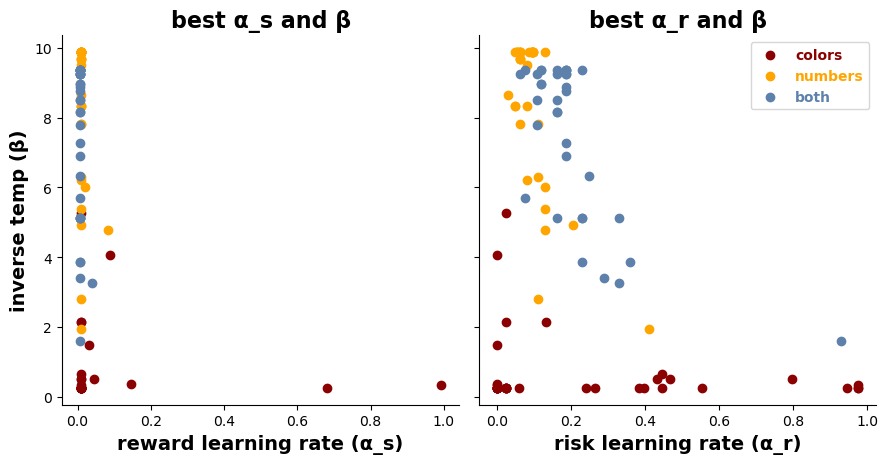

In [7]:
scatter_colors = ['#8b0000', 'orange', '#5e81ac']

alpha_s_values = [
    best_alphas_s_see_colors, 
    best_alphas_s_see_numbers, 
    best_alphas_s_sees_colors_and_numbers
]

alpha_r_values = [
    best_alphas_r_see_colors, 
    best_alphas_r_see_numbers, 
    best_alphas_r_sees_colors_and_numbers
]


beta_values = [
    best_betas_see_colors, 
    best_betas_see_numbers, 
    best_betas_sees_colors_and_numbers
]

labels = ['colors', 'numbers', 'both']

fig, axes = plt.subplots(1, 2, figsize=(9, 5), sharey=True)

# α s
for i in range(3):
    axes[0].scatter(alpha_s_values[i], beta_values[i], color=scatter_colors[i], label=labels[i])
    axes[0].set_xlabel("reward learning rate (α_s)", fontsize=14, fontweight='bold')
    axes[0].set_ylabel("inverse temp (β)", fontsize=14, fontweight='bold')
    axes[0].set_title("best α_s and β", fontsize=16, fontweight='bold')

# α r
for i in range(3):
    axes[1].scatter(alpha_r_values[i], beta_values[i], color=scatter_colors[i], label=labels[i])
    axes[1].set_xlabel("risk learning rate (α_r)", fontsize=14, fontweight='bold')
    axes[1].set_title("best α_r and β", fontsize=16, fontweight='bold')
    



# Styling for all subplots
for ax in axes:
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.tick_params(axis='both', labelsize=10)
    
# Legend only once
legend = axes[1].legend()
for text, color in zip(legend.get_texts(), scatter_colors):
    text.set_color(color)
    text.set_fontweight('bold')

plt.tight_layout(rect=[0, 0, 1, 0.95])
filename = os.path.join(output_dir, "models_evaluation_comparison_best_alphas_eta_beta.pdf")
plt.savefig(filename, format='pdf')
print(f"Saved: {filename}")

plt.show()
